In [1]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from agent.dyna_Q_model import DynaQAgent
from customEnv.SimpleCornIrrigationEnv import SimpleCornIrrigationEnv


In [2]:
env = SimpleCornIrrigationEnv(
    season_length=120,
    difficulty="normal",
    region_type="temperate",
    seed=42
)

In [3]:
agent = DynaQAgent(
    env=env,
    alpha=0.3,                     # Learning rate
    gamma=0.95,                    # Discount factor
    epsilon=1.0,                   # Initial exploration rate
    min_epsilon=0.01,              # Minimum exploration rate
    epsilon_decay=0.995,           # Exploration decay rate
    planning_steps=30,             # Number of planning steps
    bins=20,                       # Number of bins for state discretization
    log_dir="./logs/dyna-q"
)

Loading latest model from: ./logs/dyna-q\dyna_q_model.pkl

===== Model Training Summary =====
Continuing training from existing model
Model path: Auto-detected
Additional episodes: 300
Current epsilon: 0.0494

Episode 1/300: Reward = 80.50, Avg Reward = 80.50, Epsilon = 0.0492
  Yield: 0.10, Water Used: 390.0 mm
Episode 21/300: Reward = 379.40, Avg Reward = 291.11, Epsilon = 0.0445
  Yield: 0.10, Water Used: 425.0 mm
Episode 41/300: Reward = 440.20, Avg Reward = 308.72, Epsilon = 0.0402
  Yield: 0.10, Water Used: 420.0 mm
Episode 61/300: Reward = -71.30, Avg Reward = 459.84, Epsilon = 0.0364
  Yield: 0.10, Water Used: 400.0 mm
Episode 81/300: Reward = 69.20, Avg Reward = 295.91, Epsilon = 0.0329
  Yield: 0.10, Water Used: 410.0 mm
Episode 101/300: Reward = 482.70, Avg Reward = 304.07, Epsilon = 0.0298
  Yield: 0.22, Water Used: 405.0 mm
Episode 121/300: Reward = 390.35, Avg Reward = 416.98, Epsilon = 0.0269
  Yield: 0.17, Water Used: 330.0 mm
Episode 141/300: Reward = 517.08, Avg Rewar

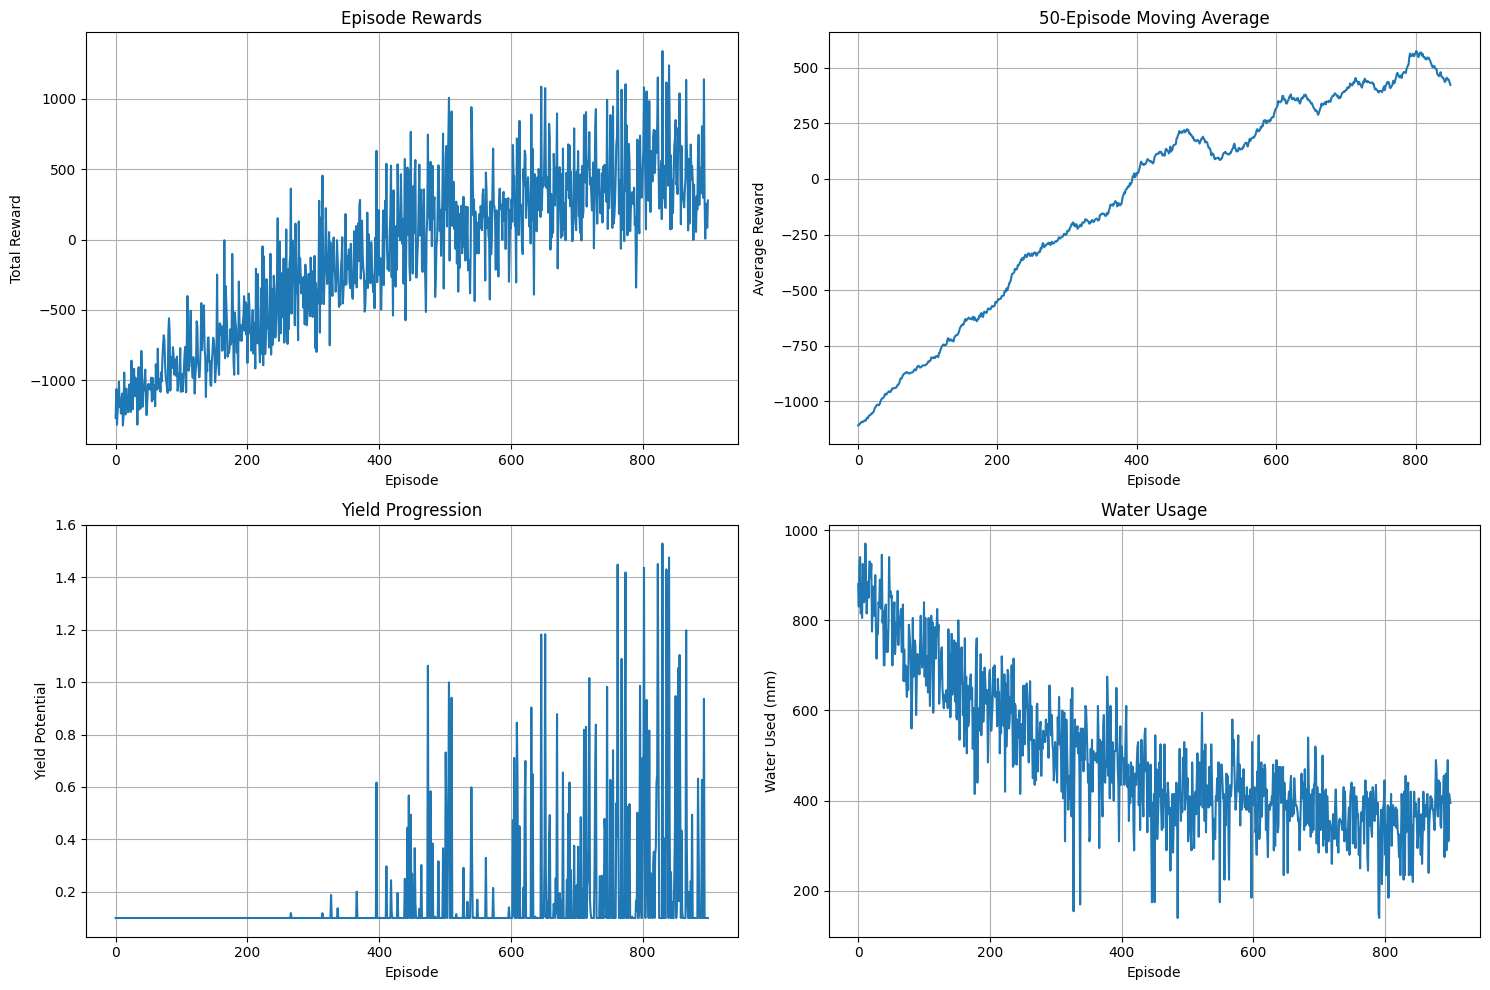

Agent saved to ./models/dyna_q_irrigation.pkl


In [4]:
# Training requires more episodes than DQN since Dyna-Q is a tabular method
rewards = agent.train(
    episodes=300,                  # Number of training episodes
    max_steps=1000,                # Maximum steps per episode
    render_interval=20,            # Frequency of progress updates
    save_model=True                # Save model after training
    
)

# Save the agent model for later use
agent_path = "./models/dyna_q_irrigation.pkl"

# Save agent data
agent_data = {
    "q_table": dict(agent.q_table),
    "model": agent.model,
    "alpha": agent.alpha,
    "gamma": agent.gamma,
    "epsilon": agent.epsilon,
    "min_epsilon": agent.min_epsilon,
    "epsilon_decay": agent.epsilon_decay,
    "planning_steps": agent.planning_steps,
    "bins": agent.bins,
    "obs_bins": agent.obs_bins
}

# Save to file
with open(agent_path, 'wb') as f:
    pickle.dump(agent_data, f)

print(f"Agent saved to {agent_path}")

In [11]:
eval_results = agent.evaluate(
    n_episodes=10,
    render=False
)

# The evaluate method automatically calculates and prints average metrics
# but we can also extract and display them here
mean_reward = eval_results["mean_reward"]
std_reward = eval_results["std_reward"]
mean_yield = eval_results.get("mean_yield", 0)
mean_water = eval_results.get("mean_water", 0)

print(f"Average Reward: {mean_reward:.2f}")
print(f"Average Yield: {mean_yield:.2f}")
print(f"Average Water Used: {mean_water:.2f} mm")

print("\nDetailed evaluation results:")
for i, reward in enumerate(eval_results["rewards"]):
    yield_val = eval_results["yields"][i] if "yields" in eval_results else 0
    water = eval_results["water_usage"][i] if "water_usage" in eval_results else 0
    print(f"Episode {i+1}: Reward={reward:.2f}, Yield={yield_val:.2f}, Water={water:.1f}mm")


===== Evaluation Results =====
Episodes: 10
Average Reward: 521.92 ± 249.43
Average Yield: 0.31
Average Water Used: 368.50 mm
Average Reward: 521.92
Average Yield: 0.31
Average Water Used: 368.50 mm

Detailed evaluation results:
Episode 1: Reward=851.46, Yield=0.62, Water=345.0mm
Episode 2: Reward=774.85, Yield=0.98, Water=260.0mm
Episode 3: Reward=373.10, Yield=0.10, Water=410.0mm
Episode 4: Reward=846.36, Yield=0.47, Water=415.0mm
Episode 5: Reward=541.80, Yield=0.10, Water=370.0mm
Episode 6: Reward=356.70, Yield=0.10, Water=375.0mm
Episode 7: Reward=521.50, Yield=0.10, Water=410.0mm
Episode 8: Reward=9.20, Yield=0.10, Water=370.0mm
Episode 9: Reward=356.70, Yield=0.10, Water=375.0mm
Episode 10: Reward=587.51, Yield=0.46, Water=355.0mm



===== Running Complete Growing Season Simulation =====
Day  10 | Stage: Seedling  | Action: 0 ( 0mm) | Soil Moisture: 100.0% | Yield: 0.96
Day  20 | Stage: Jointing  | Action: 0 ( 0mm) | Soil Moisture: 91.6% | Yield: 0.78
Day  30 | Stage: Jointing  | Action: 1 ( 5mm) | Soil Moisture: 100.0% | Yield: 0.72
Day  40 | Stage: Staminate | Action: 1 ( 5mm) | Soil Moisture: 100.0% | Yield: 0.50
Day  50 | Stage: Staminate | Action: 2 (10mm) | Soil Moisture: 85.8% | Yield: 0.57
Day  60 | Stage: Filling   | Action: 0 ( 0mm) | Soil Moisture: 70.6% | Yield: 0.71
Day  70 | Stage: Filling   | Action: 1 ( 5mm) | Soil Moisture: 82.1% | Yield: 0.82
Day  80 | Stage: Filling   | Action: 0 ( 0mm) | Soil Moisture: 78.9% | Yield: 0.94
Day  90 | Stage: Maturity  | Action: 0 ( 0mm) | Soil Moisture: 85.9% | Yield: 0.96
Day 100 | Stage: Maturity  | Action: 1 ( 5mm) | Soil Moisture: 100.0% | Yield: 0.58
Day 110 | Stage: Maturity  | Action: 0 ( 0mm) | Soil Moisture: 100.0% | Yield: 0.19
Day 120 | Stage: Maturity 

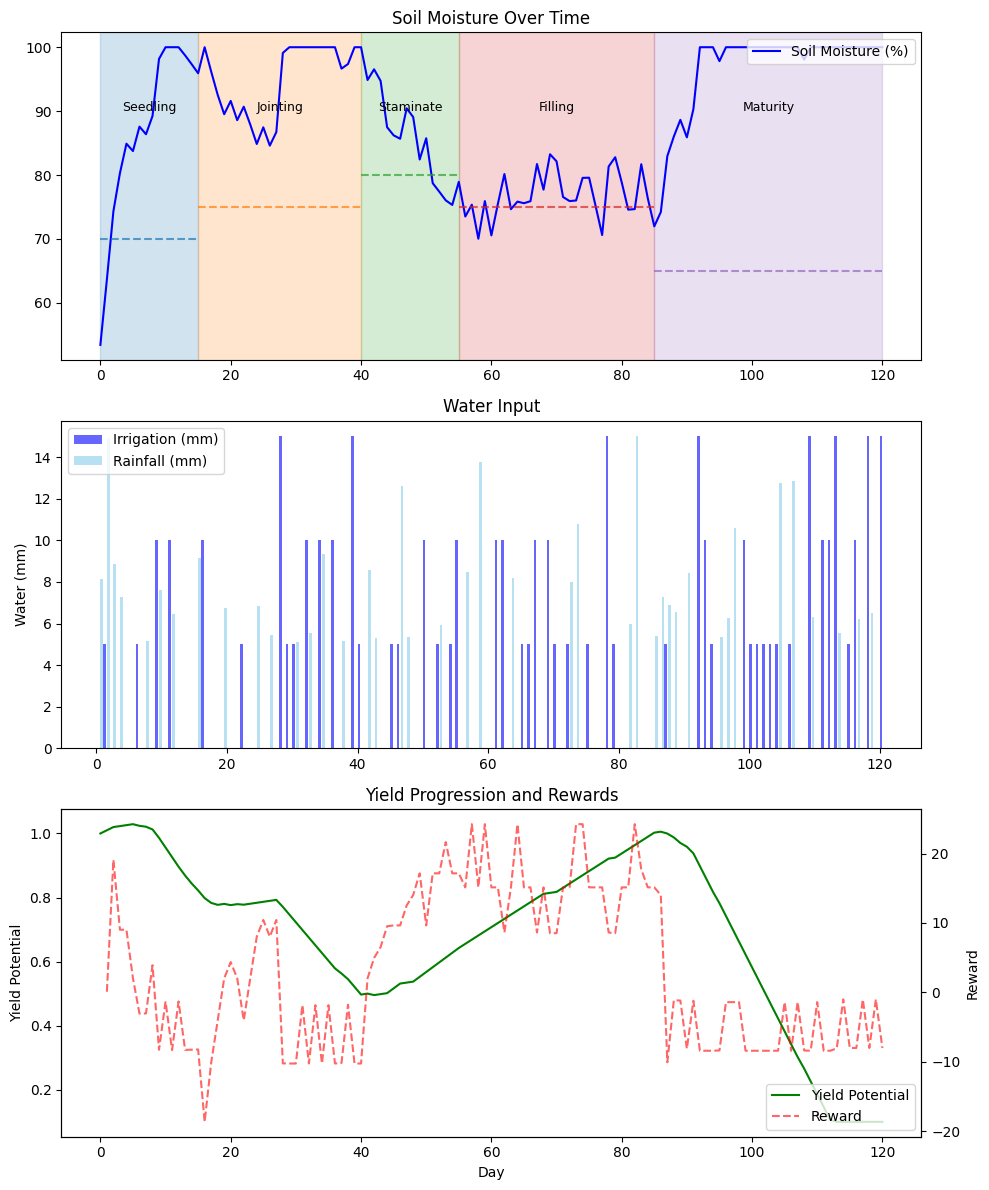


--- Season Summary ---
Final Yield: 0.10
Total Water Used: 415.0 mm
Total Rainfall: 326.7 mm
Water Efficiency: 0.024

Season Performance Metrics:
Total Reward: 332.10
Final Yield: 0.10
Water Used: 415.0 mm
Water Efficiency: 0.0002


In [6]:
print("\n===== Running Complete Growing Season Simulation =====")
reward, yield_potential, water_used = agent.run_single_episode(
    render=True,
    seed=100
)

print("\nSeason Performance Metrics:")
print(f"Total Reward: {reward:.2f}")
print(f"Final Yield: {yield_potential:.2f}")
print(f"Water Used: {water_used:.1f} mm")
print(f"Water Efficiency: {yield_potential/water_used:.4f}")

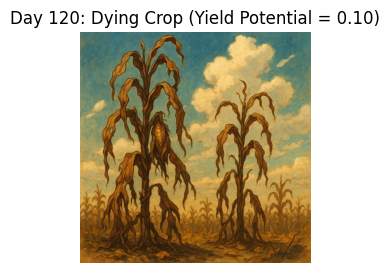


Season Performance Metrics:
Total Reward: 587.51
Final Yield: 0.10
Water Used: 415.0 mm
Water Efficiency: 0.0002


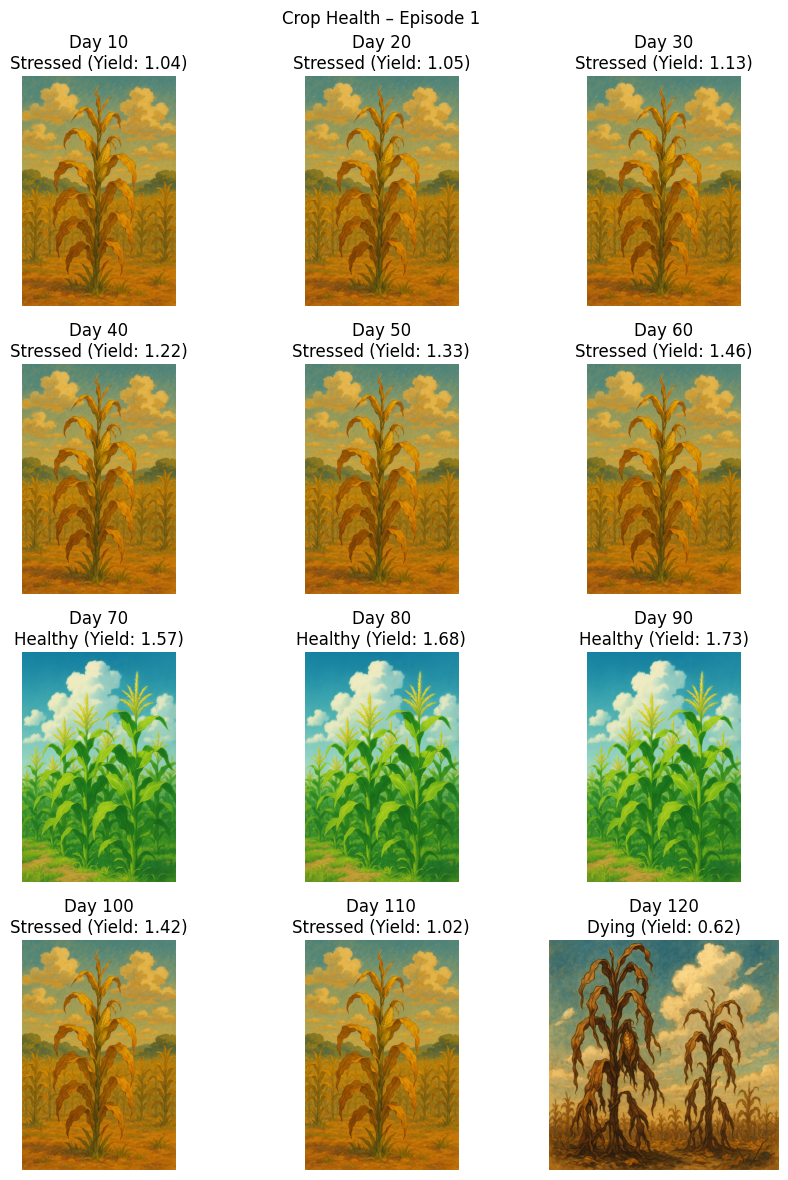

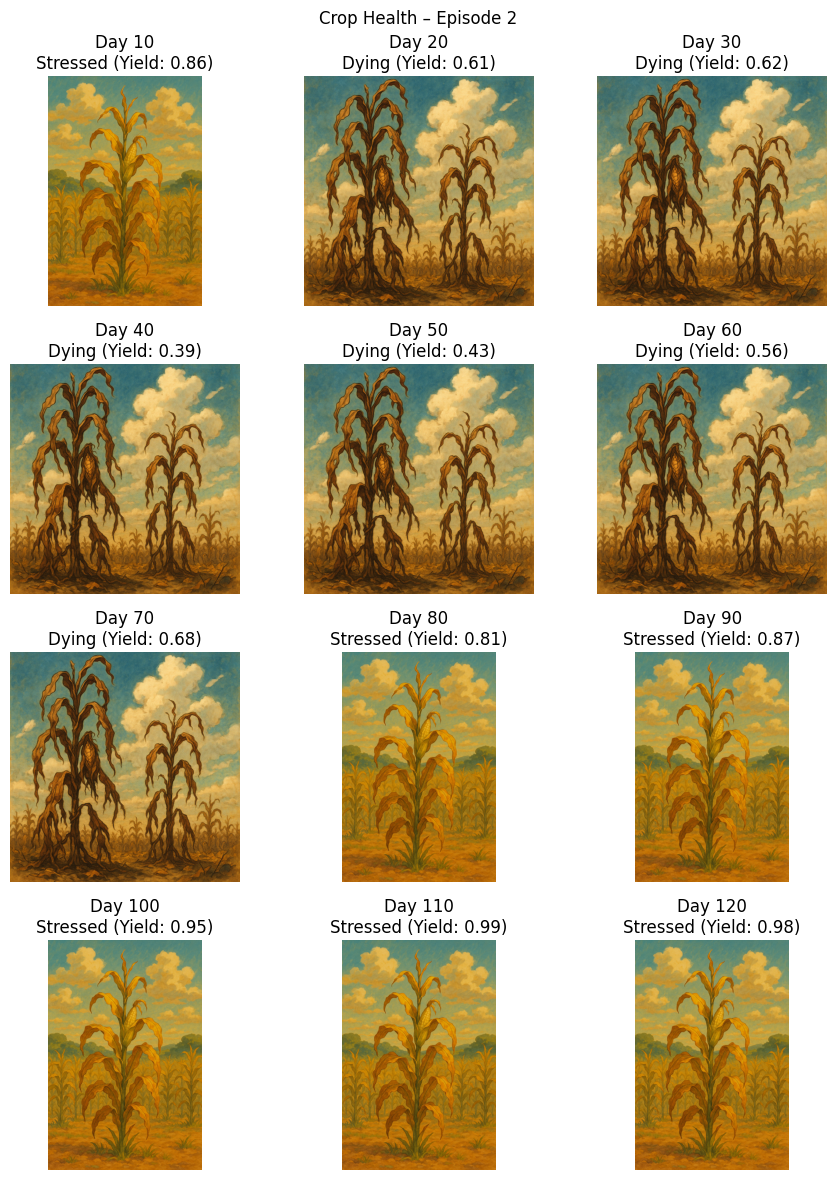

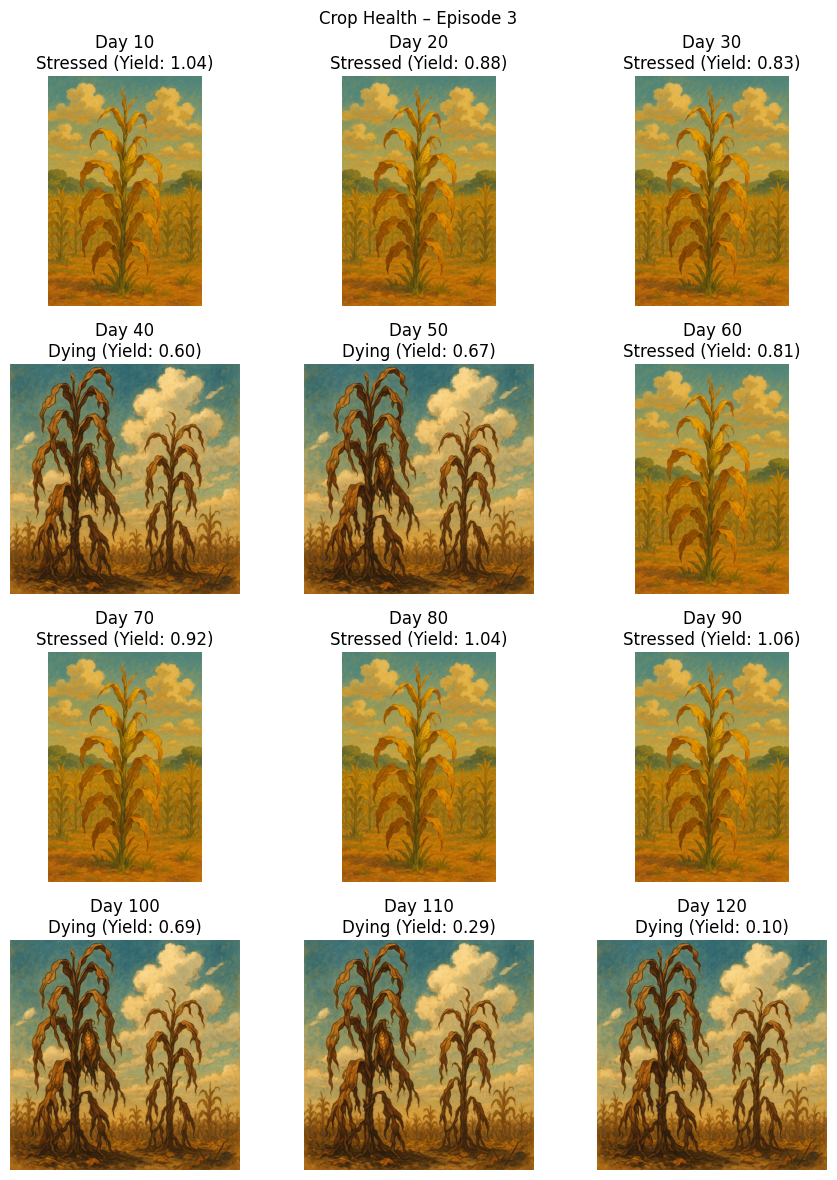

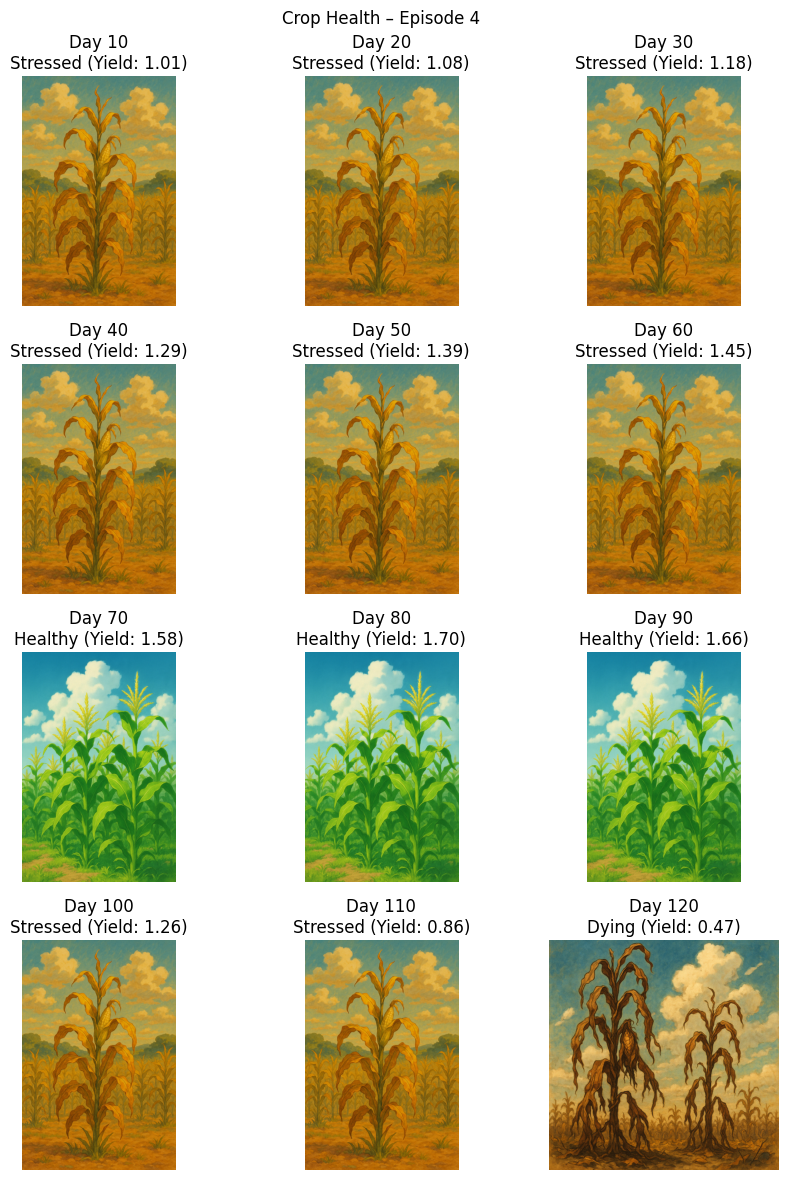

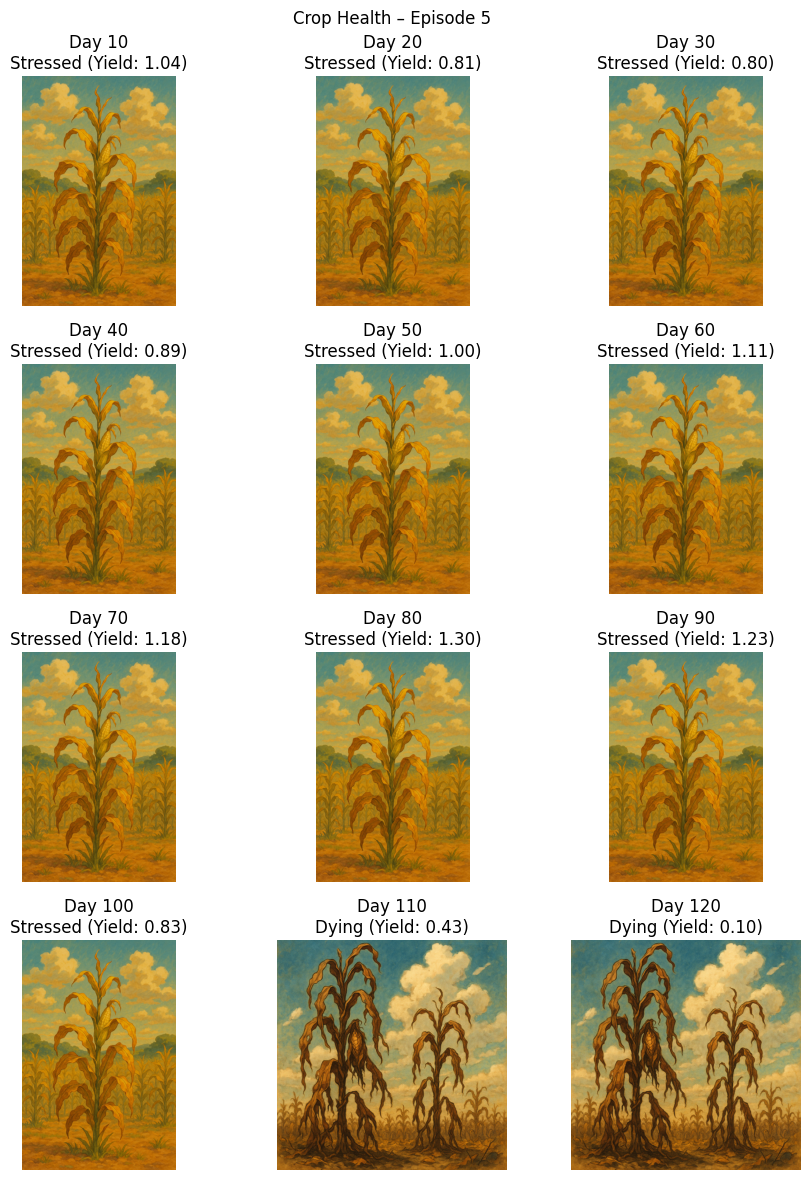

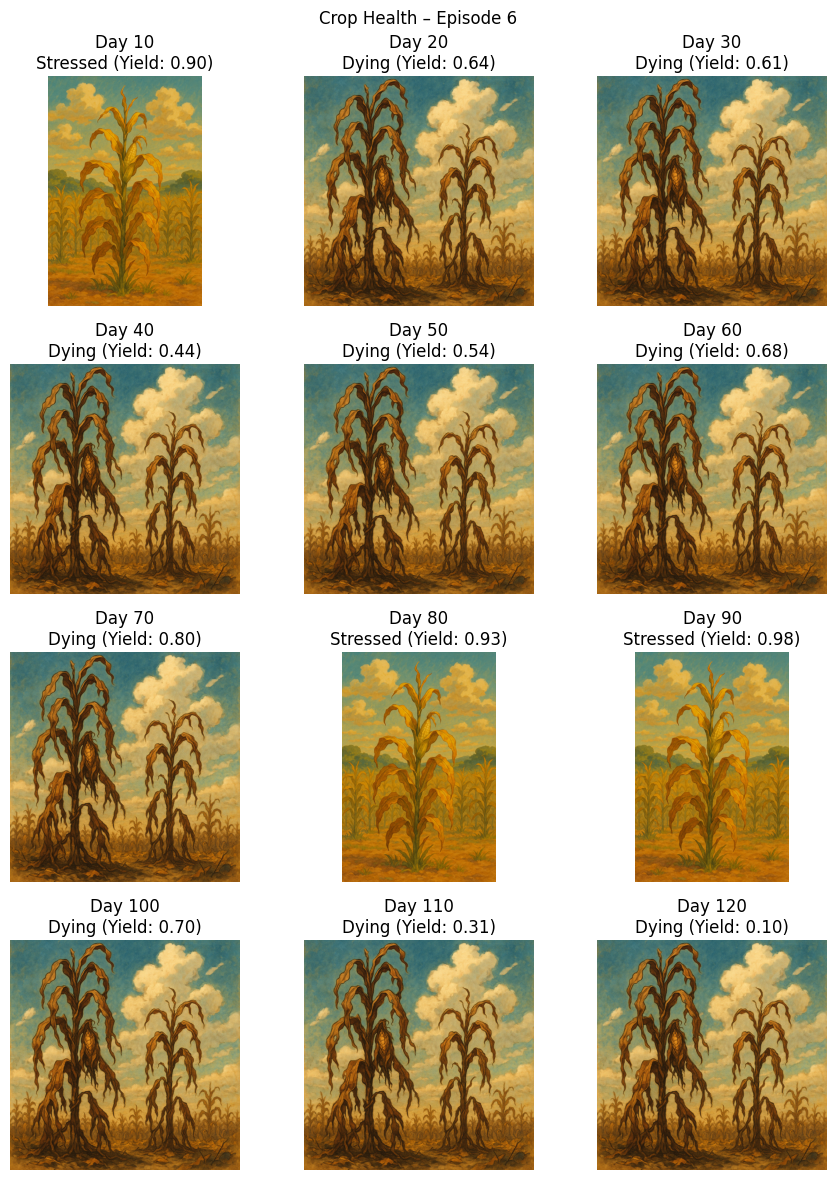

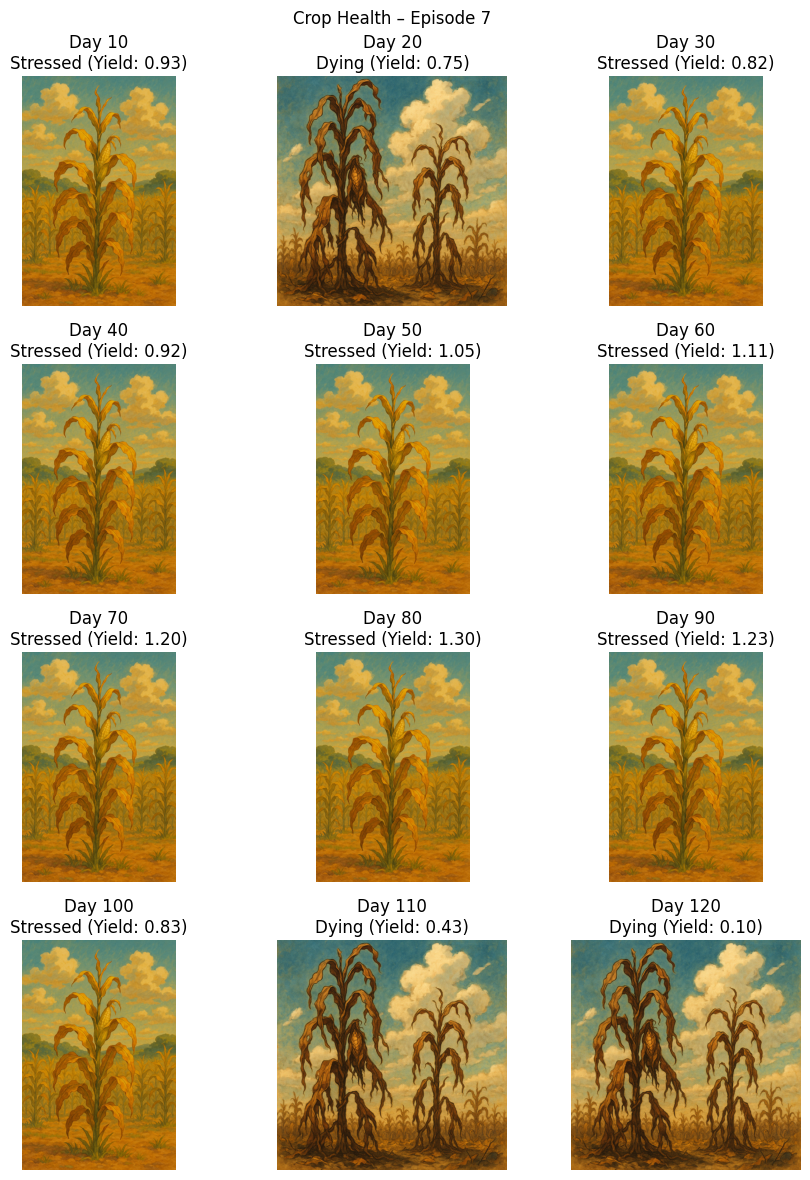

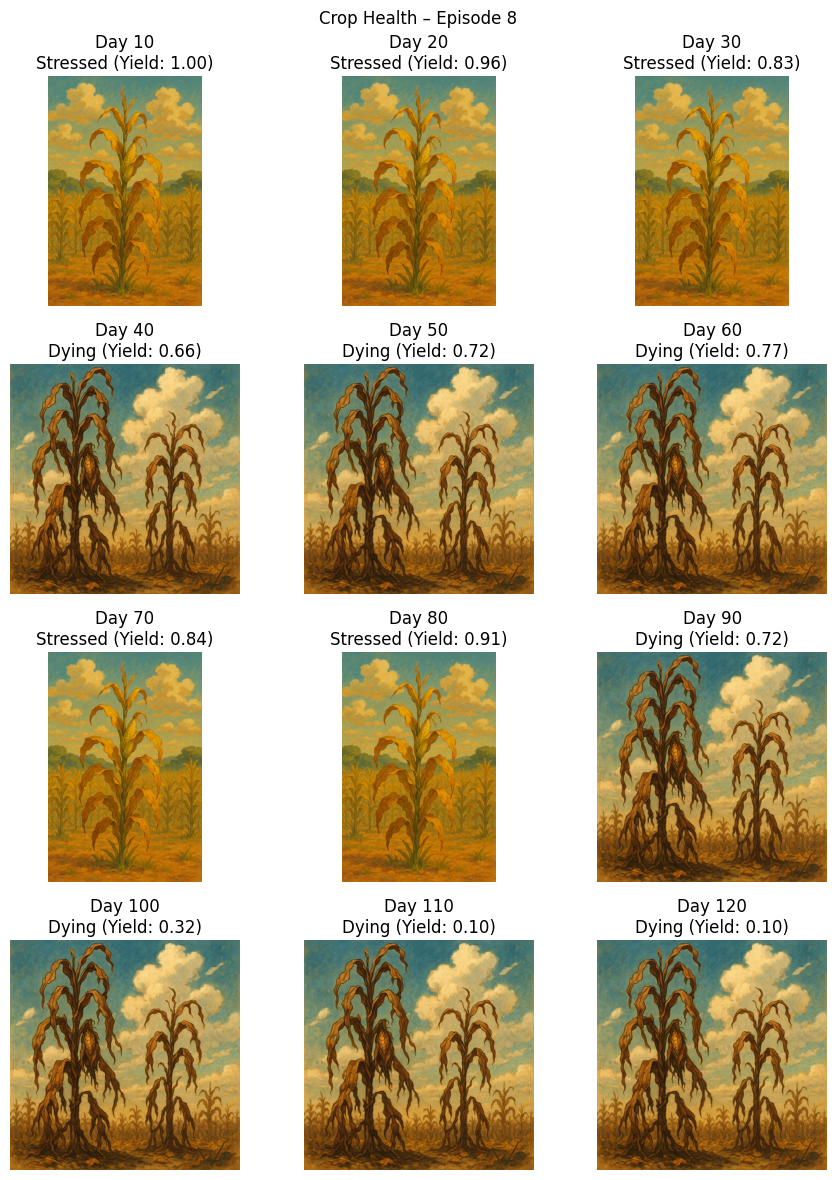

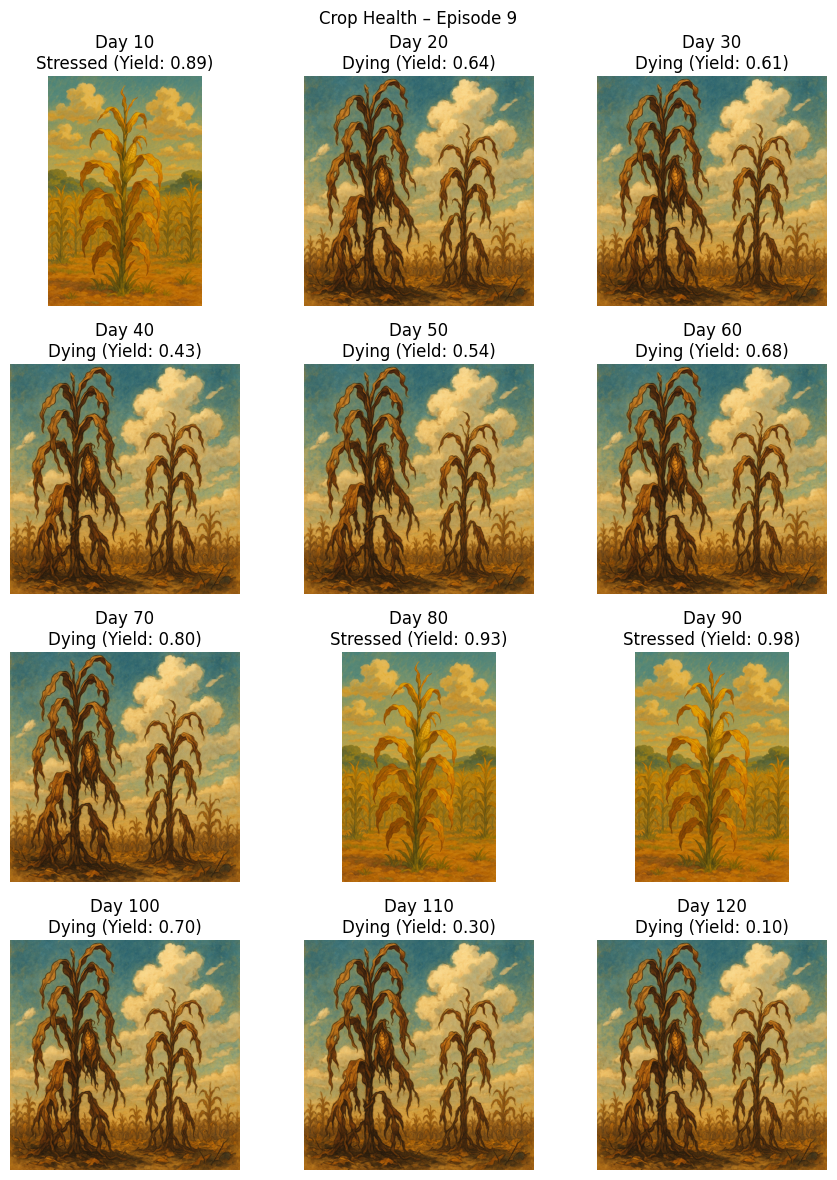

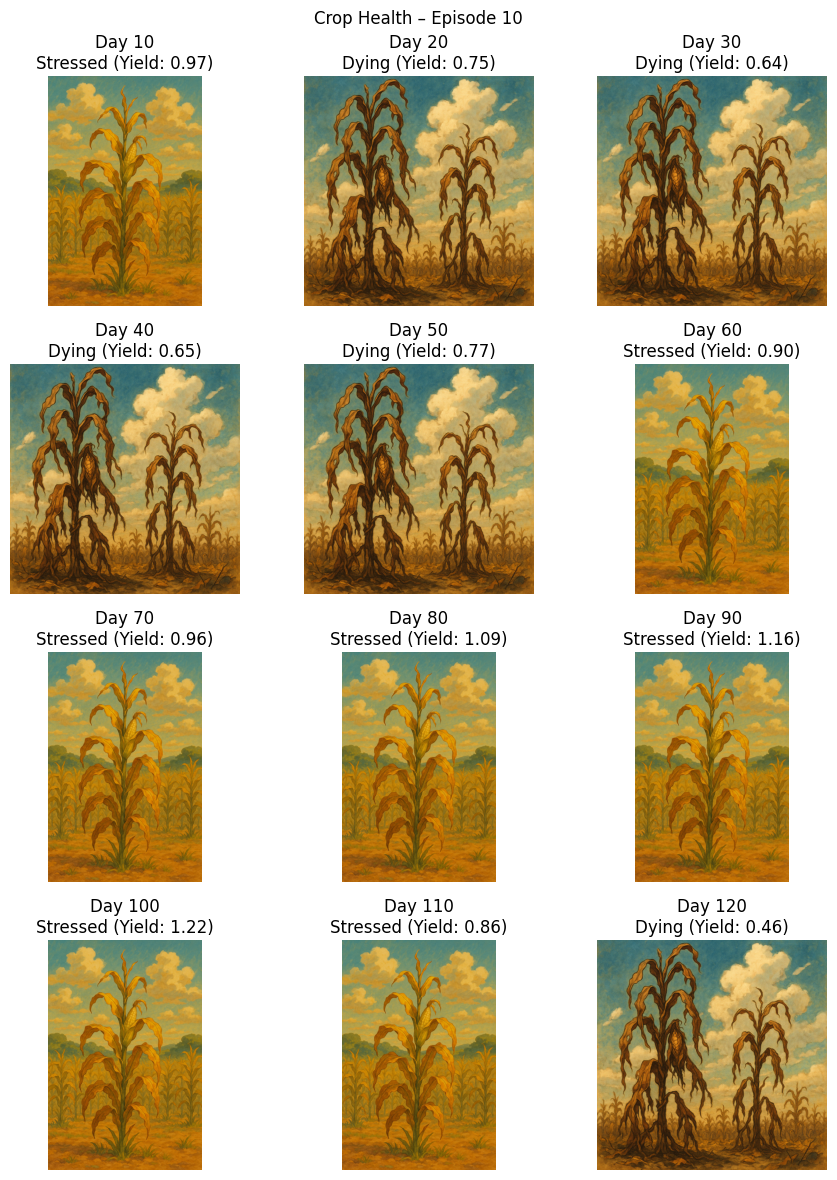


📊 Crop Report 📊
🌽 Yield: 0.31 (range: 0.10–0.98)
💧 Water Used: 368.50 mm
🌱 Moisture: 85.32% avg
📈 Episodes: 10


episode  total_reward  final_yield_potential  total_water_used  \
0        0    851.462795               0.622713               345   
1        1    774.851668               0.982528               260   
2        2    373.100000               0.100000               410   
3        3    846.362668               0.466044               415   
4        4    541.800000               0.100000               370   
5        5    356.700000               0.100000               375   
6        6    521.500000               0.100000               410   
7        7      9.200000               0.100000               370   
8        8    356.700000               0.100000               375   
9        9    587.509003               0.458483               355   

   avg_soil_moisture  
0          83.566776  
1          82.096105  
2          88.247038  
3          81.921478  
4          86.270752  
5          86.522654  
6          87.231772  
7          85.807778  
8          86.463899  
9          85.099906

In [ ]:
agent.evaluate_model(
    n_eval_episodes=10,
)

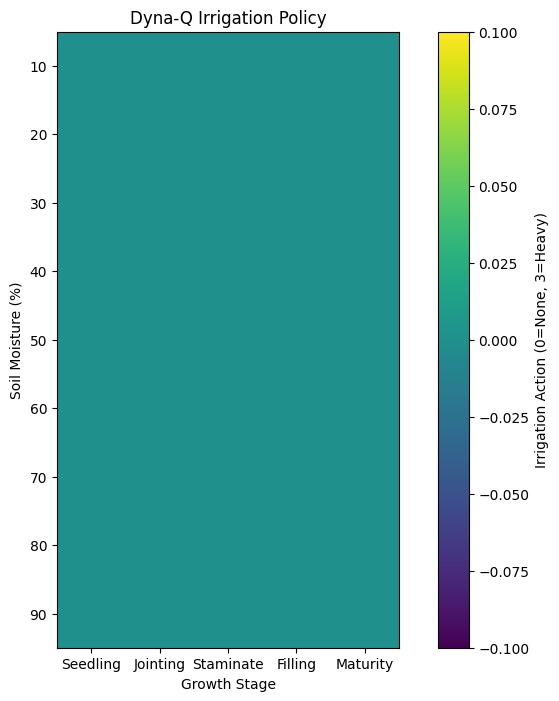

In [8]:
# This is specific to Dyna-Q - Analyze the learned policy
# Create a matrix to visualize the irrigation policy at different moisture levels and growth stages
moisture_levels = range(10, 100, 10)  # 10%, 20%, ..., 90%
growth_stages = range(5)              # 0, 1, 2, 3, 4

# Create a matrix to store preferred actions
action_matrix = np.zeros((len(moisture_levels), len(growth_stages)))

# Sample day and other observation values
sample_day = 60
sample_temp = 25
sample_rain = 0
sample_rain_prob = 20

# Analyze policy for different moisture levels and growth stages
for i, moisture in enumerate(moisture_levels):
    for j, stage in enumerate(growth_stages):
        # Create a sample observation
        obs = np.array([moisture, sample_day, stage, sample_temp, sample_rain, sample_rain_prob])
        
        # Get the discretized state
        state = agent.discretize(obs)
        
        # Get the preferred action
        action = np.argmax(agent.q_table[state])
        
        # Store in matrix
        action_matrix[i, j] = action

# Plot the policy
plt.figure(figsize=(10, 8))
plt.imshow(action_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Irrigation Action (0=None, 3=Heavy)')
plt.xlabel('Growth Stage')
plt.ylabel('Soil Moisture (%)')
plt.xticks(range(len(growth_stages)), ['Seedling', 'Jointing', 'Staminate', 'Filling', 'Maturity'])
plt.yticks(range(len(moisture_levels)), moisture_levels)
plt.title('Dyna-Q Irrigation Policy')
plt.grid(False)
plt.show()

In [9]:
# Load a previously saved agent
def load_dyna_q_model(filepath):
    try:
        with open(filepath, 'rb') as f:
            agent_data = pickle.load(f)
        
        # Create a new agent
        loaded_agent = DynaQAgent(
            env=env,
            alpha=agent_data.get("alpha", 0.3),
            gamma=agent_data.get("gamma", 0.95),
            epsilon=0.01,  # Use minimum epsilon for evaluation
            min_epsilon=0.01,
            epsilon_decay=agent_data.get("epsilon_decay", 0.995),
            planning_steps=agent_data.get("planning_steps", 30),
            bins=agent_data.get("bins", 20),
            log_dir="./logs/dyna-q"
        )
        
        # Restore saved Q-table and model
        from collections import defaultdict
        loaded_agent.q_table = defaultdict(lambda: np.zeros(loaded_agent.n_actions))
        loaded_agent.q_table.update(agent_data["q_table"])
        loaded_agent.model = agent_data.get("model", {})
        if "obs_bins" in agent_data:
            loaded_agent.obs_bins = agent_data["obs_bins"]
        
        print(f"Agent loaded from {filepath}")
        return loaded_agent
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

# Uncomment to load a saved agent
# agent = load_dyna_q_model("./models/dyna_q_irrigation.pkl")
# if agent is not None:
#     print("Successfully loaded saved agent")